In [1]:
#Pyber

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Import our data into pandas from CSV
city = 'raw_data/city_data.csv'
city_data_df = pd.read_csv(city)

city_data_df.head(10)



,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [4]:
#there is a duplicate city, so we need to do a groupby on city, and then .sum the driver count and .first the type
city_data_clean = pd.DataFrame({'type': city_data_df.groupby('city').first()['type'],
                                'driver_count': city_data_df.groupby('city').sum()['driver_count']}).reset_index()
city_data_clean.head(10)

#set index to city to we can merbge later
#city_data_clean = city_data_clean.set_index("city")
#city_data_clean

,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban
5,Arnoldview,41,Urban
6,Campbellport,26,Suburban
7,Carrollbury,4,Suburban
8,Carrollfort,55,Urban
9,Clarkstad,21,Suburban


In [5]:
# Import our data into pandas from CSV
ride = 'raw_data/ride_data.csv'
ride_data_df = pd.read_csv(ride)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082
8,Travisville,2016-01-15 17:32:02,27.39,850152768361
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524


In [6]:
#in the ride_data_df, find avg fare per city, and total no of rides per city
#create groupby by city
group_by_city = ride_data_df.groupby("city")
avg_fares_per_city = group_by_city.mean()["fare"]
avg_fares_per_city.head(10)


city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Arnoldview      25.106452
Campbellport    33.711333
Carrollbury     36.606000
Carrollfort     25.395517
Clarkstad       31.051667
Name: fare, dtype: float64

In [7]:
total_rides_per_city = group_by_city.count()["ride_id"]
total_rides_per_city.head(10)

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Arnoldview      31
Campbellport    15
Carrollbury     10
Carrollfort     29
Clarkstad       12
Name: ride_id, dtype: int64

In [8]:
#use city groupby to sum total rides per city
group_by_city = ride_data_df.groupby("city")
total_fares_per_city = group_by_city.sum()["fare"]
total_fares_per_city.head(10)

city
Alvarezhaven    741.79
Alyssaberg      535.85
Anitamouth      335.84
Antoniomouth    519.75
Aprilchester    417.65
Arnoldview      778.30
Campbellport    505.67
Carrollbury     366.06
Carrollfort     736.47
Clarkstad       372.62
Name: fare, dtype: float64

In [14]:
rides_summary = pd.DataFrame({"avg fare per city":avg_fares_per_city,"total fares per city":total_fares_per_city,
                              "total rides per city":total_rides_per_city})
rides_summary.head()

rides_summary.reset_index(inplace=True)
rides_summary.head(10)

,city,avg fare per city,total fares per city,total rides per city
0,Alvarezhaven,23.928710,741.79,31
1,Alyssaberg,20.609615,535.85,26
2,Anitamouth,37.315556,335.84,9
3,Antoniomouth,23.625000,519.75,22
4,Aprilchester,21.981579,417.65,19
5,Arnoldview,25.106452,778.30,31
6,Campbellport,33.711333,505.67,15
7,Carrollbury,36.606000,366.06,10
8,Carrollfort,25.395517,736.47,29
9,Clarkstad,31.051667,372.62,12


In [15]:
#looking for var:
#Average Fare ($) Per City 
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

In [16]:
#merge cleaned city df with rides_summary df
merge_table = pd.merge(city_data_clean, rides_summary, on="city", how="outer")
merge_table.head(10)

,city,driver_count,type,avg fare per city,total fares per city,total rides per city
0,Alvarezhaven,21,Urban,23.928710,741.79,31
1,Alyssaberg,67,Urban,20.609615,535.85,26
2,Anitamouth,16,Suburban,37.315556,335.84,9
3,Antoniomouth,21,Urban,23.625000,519.75,22
4,Aprilchester,49,Urban,21.981579,417.65,19
5,Arnoldview,41,Urban,25.106452,778.30,31
6,Campbellport,26,Suburban,33.711333,505.67,15
7,Carrollbury,4,Suburban,36.606000,366.06,10
8,Carrollfort,55,Urban,25.395517,736.47,29
9,Clarkstad,21,Suburban,31.051667,372.62,12


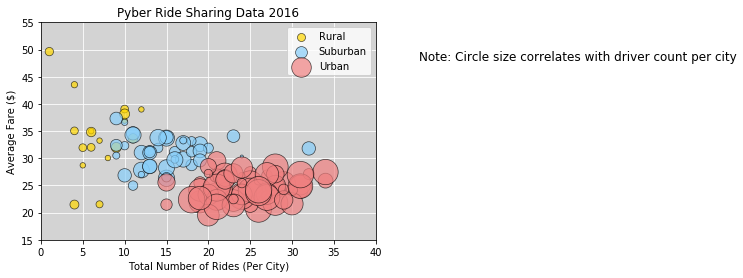

In [30]:
# make x and y var for each plot (urban, suburban, rural). x is total rides per city, y is avg fare per city. 
#s=size of dot (use driver count)


x_rural = merge_table.loc[merge_table["type"]=="Rural"]['total rides per city']
y_rural = merge_table.loc[merge_table["type"]=="Rural"]['avg fare per city']
s_rural = merge_table.loc[merge_table["type"]=="Rural"]["driver_count"]*10

x_suburban = merge_table.loc[merge_table["type"]=="Suburban"]['total rides per city']
y_suburban = merge_table.loc[merge_table["type"]=="Suburban"]['avg fare per city']
s_suburban = merge_table.loc[merge_table["type"]=="Suburban"]["driver_count"]*10

x_urban = merge_table.loc[merge_table["type"]=="Urban"]['total rides per city']
y_urban = merge_table.loc[merge_table["type"]=="Urban"]['avg fare per city']
s_urban = merge_table.loc[merge_table["type"]=="Urban"]["driver_count"]*10

# plot and style the data
plt.scatter(x_rural, y_rural, s=s_rural, marker="o",
                   c="gold", alpha=.7, linewidths=.7, edgecolors="black", label="Rural")
plt.scatter(x_suburban, y_suburban, s=s_suburban, marker="o",
                    c="lightskyblue", alpha=.7, linewidths=.7, edgecolors="black", label="Suburban")
plt.scatter(x_urban, y_urban, s=s_urban, marker="o",
                    c="lightcoral", alpha=.7, linewidths=.7, edgecolors="black", label="Urban")

# #create title, x and y labels, x and y limits
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0, 40)
plt.ylim(15, 55)

#make a legend, grid, change background color to lightgrey, add a note
plt.legend(labels=["Rural","Suburban","Urban"])
plt.gca().set_axisbelow(True)
plt.grid(True, c='white')
plt.gca().set_facecolor('lightgrey')
plt.gcf().text(1, .75,("Note: Circle size correlates with driver count per city"), fontsize=12)
                                        

# Show the chart
plt.show()


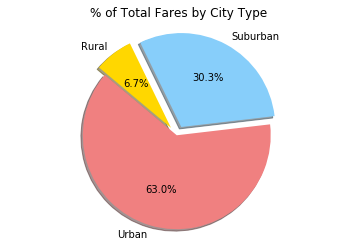

In [23]:
#make piecharts:
# % of Total Fares by City Type

urban_fares = merge_table.loc[merge_table["type"]=="Urban"]["total fares per city"].sum()
#print(urban_fares)
suburban_fares = merge_table.loc[merge_table["type"]=="Suburban"]["total fares per city"].sum()
rural_fares = merge_table.loc[merge_table["type"]=="Rural"]["total fares per city"].sum()

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
fares = [urban_fares, suburban_fares, rural_fares]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the suburban & rural sections from the others
explode = (0, 0.1, 0.1)

# Tell matplotlib to create a bar chart based upon the above data
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#title
plt.title("% of Total Fares by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("PyFares.png")
plt.show()





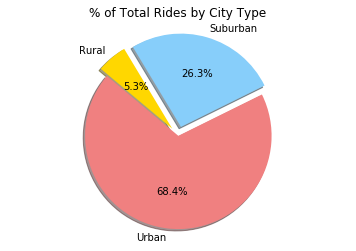

In [27]:
# % of Total Rides by City Type
urban_rides = merge_table.loc[merge_table["type"]=="Urban"]["total rides per city"].sum()
#print(urban_rides)
suburban_rides = merge_table.loc[merge_table["type"]=="Suburban"]["total rides per city"].sum()
#print(suburban_rides)
rural_rides = merge_table.loc[merge_table["type"]=="Rural"]["total rides per city"].sum()
#print(rural_rides)

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
rides = [urban_rides, suburban_rides, rural_rides]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the suburban & rural sections from the others
explode = (0, 0.1, 0.1)

# Tell matplotlib to create a bar chart based upon the above data
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#title
plt.title("% of Total Rides by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("PyRides.png")
plt.show()

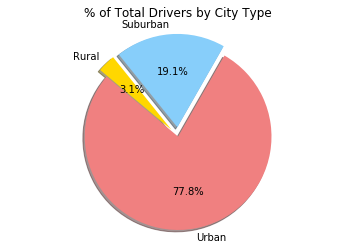

In [28]:
# % of Total Drivers by City Type

urban_drivers = merge_table.loc[merge_table["type"]=="Urban"]["driver_count"].sum()
#print(urban_drivers)
suburban_drivers = merge_table.loc[merge_table["type"]=="Suburban"]["driver_count"].sum()
#print(suburban_drivers)
rural_drivers = merge_table.loc[merge_table["type"]=="Rural"]["driver_count"].sum()
#print(rural_drivers)

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
drivers = [urban_drivers, suburban_drivers, rural_drivers]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the suburban & rural sections from the others
explode = (0, 0.1, 0.1)

# Tell matplotlib to create a bar chart based upon the above data
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#title
plt.title("% of Total Drivers by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("PyDrivers.png")
plt.show()

In [ ]:
#Analysis:
#Observation One:
#The data correlates heavily by city type. Urban has more rides, drivers, and fares overall, followed by suburban, 
#followed by rural. To be expected given the service.

#Observation Two:
#There is a much larger spread in the average fares of rural cities. Most urban fares are between $20-30, but with 
#rural fares, there is no such trend. They range from about $22-50, with the average fares from all rural cities 
#spread out in between.

#Observation Three:
#There is also a wider spread in the total number of rides amongst suburban cities than in either urban or rural. Some 
#suburban cities have fewer than 10 rides, while one has over 30. Most suburban cities had a ride total in the teens.

#Observation Four:
#Urban drivers occupy almost 78% of the total drivers, and yet they are competing for 68% of rides and 
#63% of fares, so competition amongst this driver group is higher. In contrast, 19% of the drivers are suburban 
#but they are commanding 30% of the total fares.